In [1]:
from pymongo import MongoClient
import pandas as pd




In [2]:

mongo_client = MongoClient('localhost', 27017)
db = mongo_client['db']
collection = db['tweets_inwi']


tweets = pd.DataFrame(list(collection.find()))
tweets.head(1)


,_id,tweet_id,tweet_date,nbr_likes,nbr_retweets,nbr_caracters,author_id,text,comments
0,676bea28f79f312fd703d50e,1871877916285706650,2024-12-25 11:17:27+00:00,0,0,230,1849839193763012608,مباريات اليوم من مؤجل الجولة 14 من البطولة الإ...,"[{'comment_order': 0, 'comment_date': None, 'c..."


In [4]:
tweets.columns

Index(['_id', 'tweet_id', 'tweet_date', 'nbr_likes', 'nbr_retweets',
       'nbr_caracters', 'author_id', 'text', 'comments'],
      dtype='object')

In [5]:
tweets.head(4)

,_id,tweet_id,tweet_date,nbr_likes,nbr_retweets,nbr_caracters,author_id,text,comments
0,676bea28f79f312fd703d50e,1871877916285706650,2024-12-25 11:17:27+00:00,0,0,230,1849839193763012608,مباريات اليوم من مؤجل الجولة 14 من البطولة الإ...,"[{'comment_order': 0, 'comment_date': None, 'c..."
1,676bedc9f79f312fd703d50f,1871878320314634276,2024-12-25 11:19:04+00:00,0,1,139,1455257774,RT @LNFP_Officiel: مباريات اليوم من مؤجل الجول...,"[{'comment_order': 0, 'comment_date': None, 'c..."
2,676bedfcf79f312fd703d511,1871870247172780236,2024-12-25 10:46:59+00:00,1,0,52,1342619772308115456,Xmas Botola Pro Inwi 🇲🇦🎄!!!! https://t.co/xWRQ...,"[{'comment_order': 0, 'comment_date': None, 'c..."
3,676bee16f79f312fd703d512,1871847495346815252,2024-12-25 09:16:34+00:00,0,0,70,1086724355801956352,@NdouK1997 @InnocentKhabz Ni a mudivha Pelepel...,"[{'comment_order': 0, 'comment_date': None, 'c..."


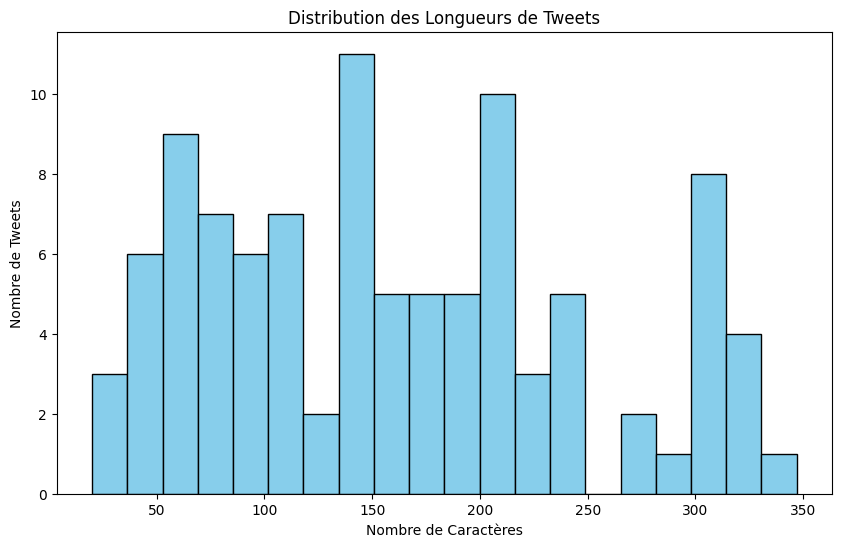

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(tweets['nbr_caracters'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution des Longueurs de Tweets')
plt.xlabel('Nombre de Caractères')
plt.ylabel('Nombre de Tweets')
plt.show()


In [17]:
from collections import Counter
import re


def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  
    text = re.sub(r'\W', ' ', text)  # Supprimer les caractères spéciaux
    text = re.sub(r'\s+', ' ', text)  # Remplacer les espaces multiples par un seul espace
    text = text.lower()  # Mettre en minuscules
    return text


tweets['cleaned_text'] = tweets['text'].apply(clean_text)


all_words = " ".join(tweets['cleaned_text']).split()
word_counts = Counter(all_words)


common_words = word_counts.most_common(10)
print(common_words)


[('de', 80), ('inwi', 76), ('la', 44), ('le', 37), ('maroc', 29), ('et', 29), ('l', 28), ('a', 27), ('à', 27), ('maroc_telecom', 25)]


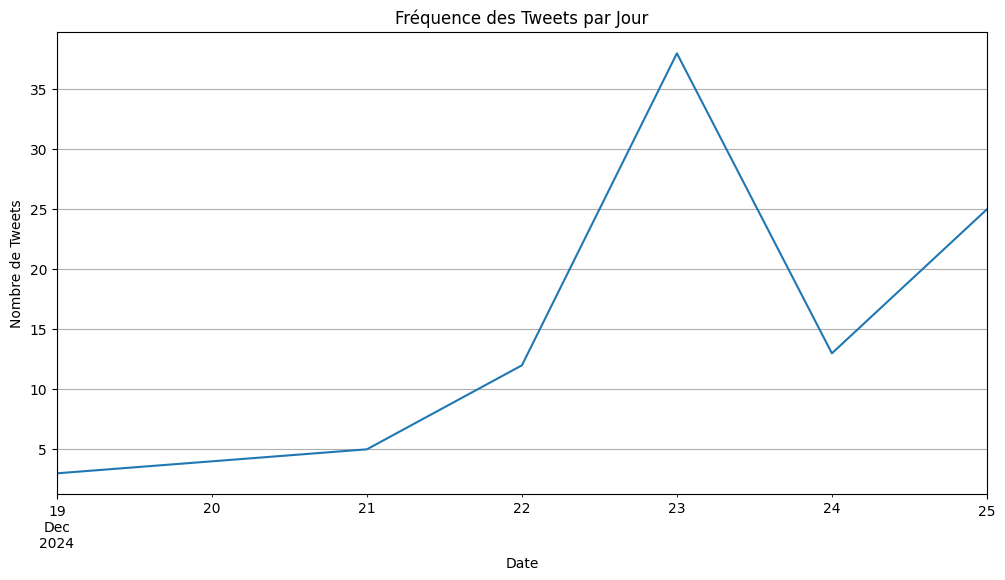

In [19]:
tweets['tweet_date'] = pd.to_datetime(tweets['tweet_date'])

plt.figure(figsize=(12, 6))
tweets.resample('D', on='tweet_date').count()['text'].plot()
plt.title('Fréquence des Tweets par Jour')
plt.xlabel('Date')
plt.ylabel('Nombre de Tweets')
plt.grid(True)
plt.show()


In [20]:
print("Nombre total de tweets :", len(tweets))
print("Longueur moyenne des tweets :", tweets['nbr_caracters'].mean())
print("Auteur le plus actif :", tweets['author_id'].value_counts().idxmax())
print("Nombre de tweets par jour (moyenne) :", tweets.resample('D', on='tweet_date').count()['text'].mean())


Nombre total de tweets : 100
Longueur moyenne des tweets : 159.99
Auteur le plus actif : 1849839193763012608
Nombre de tweets par jour (moyenne) : 14.285714285714286


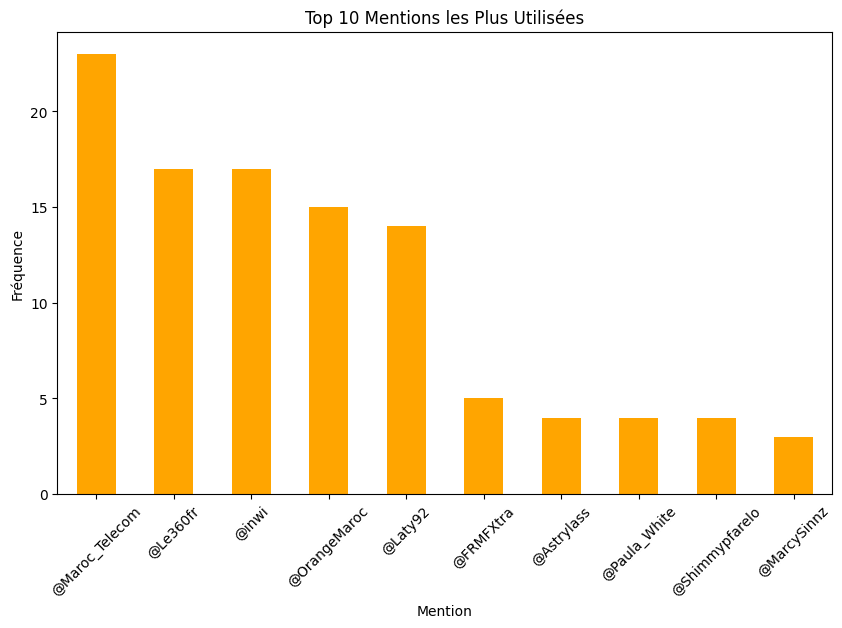

In [21]:
tweets['mentions'] = tweets['text'].apply(lambda x: re.findall(r'@\w+', x))
mentions_list = [mention for sublist in tweets['mentions'] for mention in sublist]
mentions_counts = pd.Series(mentions_list).value_counts().head(10)

plt.figure(figsize=(10, 6))
mentions_counts.plot(kind='bar', color='orange')
plt.title('Top 10 Mentions les Plus Utilisées')
plt.xlabel('Mention')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)
plt.show()


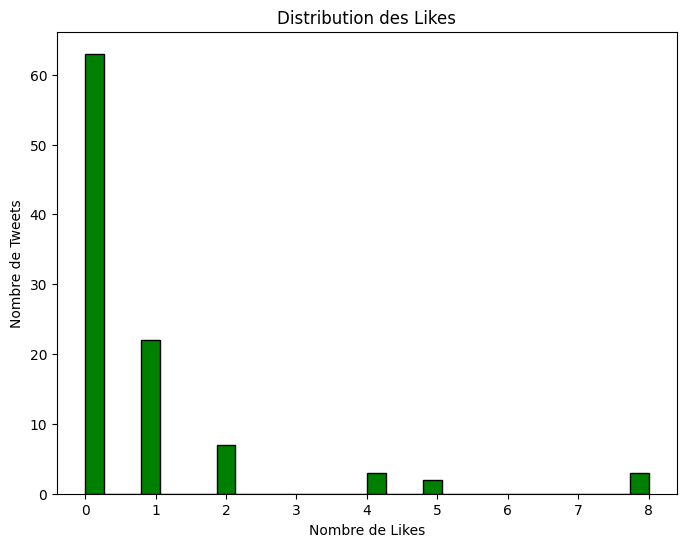

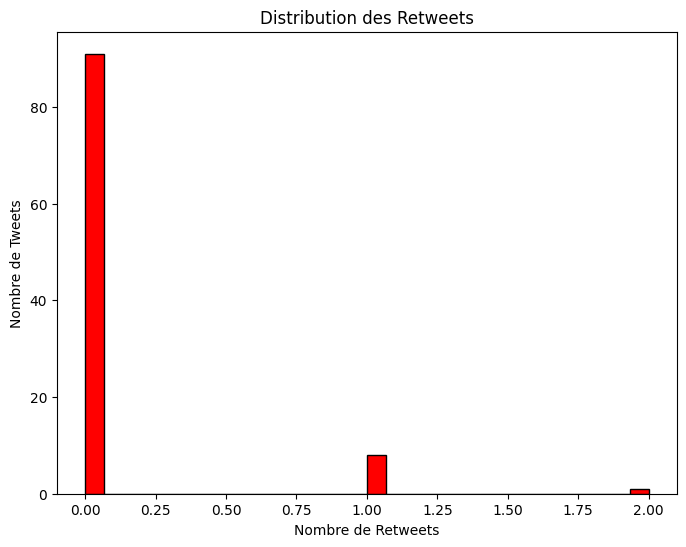

In [31]:
plt.figure(figsize=(8, 6))
tweets['nbr_likes'].plot(kind='hist', bins=30, color='green', edgecolor='black')
plt.title('Distribution des Likes')
plt.xlabel('Nombre de Likes')
plt.ylabel('Nombre de Tweets')
plt.show()

plt.figure(figsize=(8, 6))
tweets['nbr_retweets'].plot(kind='hist', bins=30, color='red', edgecolor='black')
plt.title('Distribution des Retweets')
plt.xlabel('Nombre de Retweets')
plt.ylabel('Nombre de Tweets')
plt.show()


In [23]:
tweets.to_csv("/home/user/Desktop/twitter-sentiment-Inwi/data/tweets.csv", index=False)

## Negative Tweets

In [24]:
negative_tweets = pd.read_csv('/home/user/Desktop/twitter-sentiment-Inwi/data/negative_tweets.csv')

In [25]:
negative_tweets.head()

,_id,tweet_id,tweet_date,nbr_likes,nbr_retweets,nbr_caracters,author_id,text,comments,cleaned_text,mentions,sentiment,score
0,676bedfcf79f312fd703d511,1871870247172780236,2024-12-25 10:46:59+00:00,1,0,52,1342619772308115456,Xmas Botola Pro Inwi 🇲🇦🎄!!!! https://t.co/xWRQ...,"[{'comment_order': 0, 'comment_date': None, 'c...",xmas botola pro inwi,[],negative,0.416886
1,676bee16f79f312fd703d512,1871847495346815252,2024-12-25 09:16:34+00:00,0,0,70,1086724355801956352,@NdouK1997 @InnocentKhabz Ni a mudivha Pelepel...,"[{'comment_order': 0, 'comment_date': None, 'c...",ndouk1997 innocentkhabz ni a mudivha pelepele...,"['@NdouK1997', '@InnocentKhabz']",negative,0.676985
2,676beeb2f79f312fd703d518,1871833908066869624,2024-12-25 08:22:35+00:00,0,0,241,1842003544326770688,Seleb Tiktok Zqya blunder pas lagi mabok di bu...,"[{'comment_order': 0, 'comment_date': None, 'c...",seleb tiktok zqya blunder pas lagi mabok di bu...,[],negative,0.461115
3,676bfa2a1dc6f2a0de15b117,1871761157788426399,2024-12-25 03:33:30+00:00,0,1,111,1356187210064809985,RT @_Botola_News: 🚨 Le programme de la 17ème j...,"[{'comment_order': 0, 'comment_date': None, 'c...",rt _botola_news le programme de la 17ème journ...,['@_Botola_News'],negative,0.662479
4,676bfdca1dc6f2a0de15b118,1871895892544111006,2024-12-25 12:28:53+00:00,0,0,213,2980038599,@Laty92 @Le360fr @OrangeMaroc @Maroc_Telecom @...,"[{'comment_order': 0, 'comment_date': None, 'c...",laty92 le360fr orangemaroc maroc_telecom inwi...,"['@Laty92', '@Le360fr', '@OrangeMaroc', '@Maro...",negative,0.573435


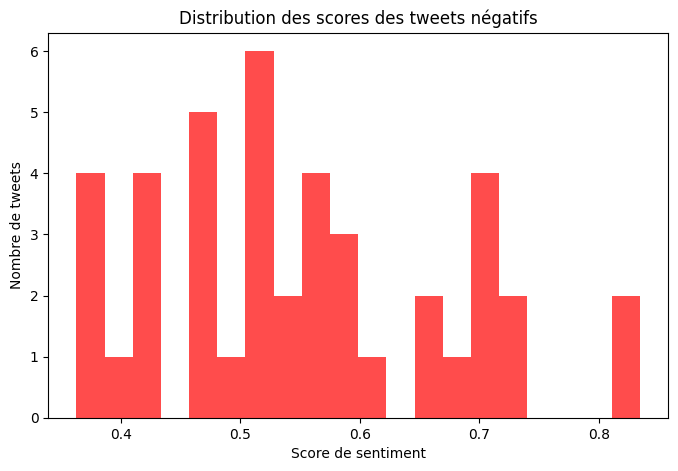

In [26]:


plt.figure(figsize=(8, 5))
plt.hist(negative_tweets['score'], bins=20, color='red', alpha=0.7)
plt.title('Distribution des scores des tweets négatifs')
plt.xlabel('Score de sentiment')
plt.ylabel('Nombre de tweets')
plt.show()



In [27]:
negative_tweets[['cleaned_text','score']]

,cleaned_text,score
0,xmas botola pro inwi,0.416886
1,ndouk1997 innocentkhabz ni a mudivha pelepele...,0.676985
2,seleb tiktok zqya blunder pas lagi mabok di bu...,0.461115
3,rt _botola_news le programme de la 17ème journ...,0.662479
4,laty92 le360fr orangemaroc maroc_telecom inwi...,0.573435
5,si no bajo a marruecos en los próximos dos mes...,0.516756
6,shimmypfarelo january muthu hu ḓo vha hu inwi...,0.362811
7,maroc_telecom bonjour j ai récemment acheté u...,0.428507
8,inwi maroc_telecom orangmaroc e momkin tzido ...,0.550116
9,mtwit75 maroc télécom a des dépassements de f...,0.527423


In [28]:
from collections import Counter
import pandas as pd




mots_freq = Counter(" ".join(negative_tweets['cleaned_text']).split())

df_freq = pd.DataFrame(mots_freq.items(), columns=['Mot', 'Fréquence']).sort_values(by='Fréquence', ascending=False)
df_freq.head(18)



,Mot,Fréquence
3,inwi,31
45,de,30
61,et,29
46,la,21
121,maroc,21
55,en,20
7,a,18
159,est,18
158,c,16
54,maroc_telecom,13


In [29]:
negative_tweets_Top = negative_tweets[
    (negative_tweets['sentiment'] == 'negative') & 
    (negative_tweets['score'] > 0)
][['cleaned_text', 'score']]


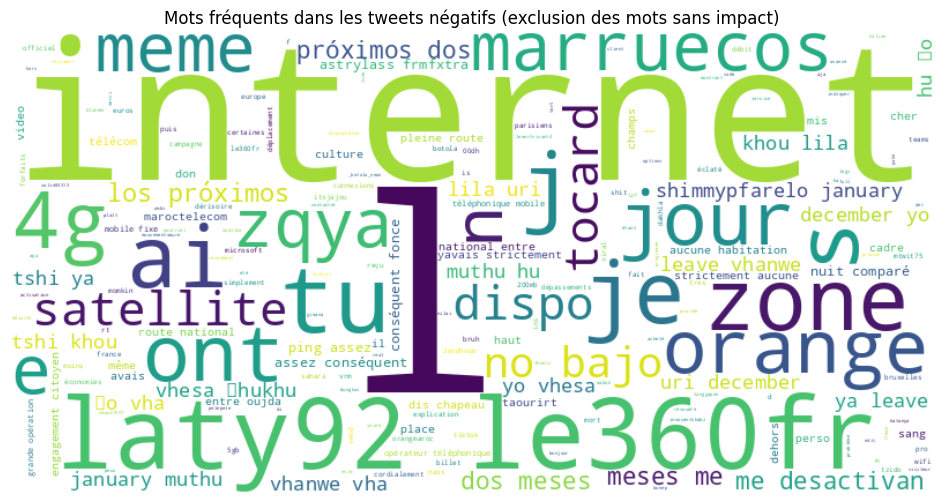

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

french_stopwords = set([
    'et', 'de', 'en', 'la', 'le', 'les', 'des', 'du', 'un', 'une', 'est', 'c\'est', 
    'cest', 'au', 'aux', 'par', 'pour', 'avec', 'sur', 'dans', 'ce', 'ces', 'ça', 'cela',
    'si', 'se', 'sa', 'son', 'ses', 'sont', 'qui', 'que', 'quoi', 'où', 'dont', 'ne',
    'pas', 'plus', 'comme', 'mais', 'ou', 'et', 'donc', 'or', 'ni', 'car', 'vers',
    'chez', 'lui', 'elle', 'nous', 'vous', 'leur', 'leurs', 'mon', 'ma', 'mes',
    'ton', 'ta', 'tes', 'notre', 'nos', 'votre', 'vos', 'leur', 'leurs', 'afin', 
    'tous', 'tout', 'toutes', 'chaque', 'aujourd\'hui', 'hier', 'demain', 'avant',
    'après', 'tel', 'telle', 'tels', 'telles', 'ici', 'là', 'ailleurs', 'partout',
    'inwi', 'maroc', 'maroc telecom', 'orange maroc','telecom','C','a','à','maroc_telecom','orangemaroc'
])


negative_text = ' '.join(negative_tweets['cleaned_text'].astype(str))


wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=french_stopwords
).generate(negative_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Mots fréquents dans les tweets négatifs (exclusion des mots sans impact)')
plt.axis('off')
plt.show()
